
# **IR Project**

In this we are going to do 
* Data Exploration
* Object Detection
* Image Segmentation
* Predict names of recipe
* Output- name of recipe, recipe information









In [ ]:
########################################################################################################################
#_____________________________________________________Import Section___________________________________________ 
########################################################################################################################
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, Dropout
from tensorflow.keras import layers
from keras.utils import to_categorical
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
import os
import cv2
import scipy.io as sio
import ntpath
from numpy import argmax
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from tensorflow.keras.applications.inception_v3 import InceptionV3

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# #
# ########################################################################################################################
# #_____________________________________________________Fetching The Training Data from Directory___________________________________________ 
# ########################################################################################################################


# train_dir='/content/drive/MyDrive/IR project-Food Segmentation/IR_Project/training'
# subdirs = [x[0] for x in os.walk(train_dir)]  

# train = []
# y_train = []
# for subdir in subdirs:                                                                                            
#         files = os.walk(subdir).__next__()[2]                                                                             
#         if (len(files) > 0):                                                                                          
#             for file in files:                                                                                        
#                 f1 = os.path.join(subdir, file)
#                 #print(f1)
#                 head, tail = ntpath.split(f1)
#                 #print(tail)
#                 name = tail.split("_")
#                 #print(name[0])
#                 label = name[0]
#                 img = cv2.imread(f1)
#                 img = cv2.cvtColor(img,cv2.COLOR_RGB2BGR)
#                 if img is not None:
#                   train.append(img)
#                   y_train.append(label) 
# # train
# # FOR TEST DATA
# test_dir = '/content/drive/MyDrive/IR project-Food Segmentation/IR_Project/testing'
# subdirs = [x[0] for x in os.walk(test_dir)]  
# test = []
# y_test = []

# for subdir in subdirs:                                                                                            
#         files = os.walk(subdir).__next__()[2]                                                                             
#         if (len(files) > 0):                                                                                          
#             for file in files:                                                                                        
#                 f1 = os.path.join(subdir, file)
#                 #print(f1)
#                 head, tail = ntpath.split(f1)
#                 #print(tail)
#                 name = tail.split("_")
#                 #print(name[0])
#                 label = name[0]
#                 img = cv2.imread(f1)
#                 img = cv2.cvtColor(img,cv2.COLOR_RGB2BGR)
#                 if img is not None:
#                   test.append(img)
#                   y_test.append(label) 

In [ ]:
#
########################################################################################################################
#_____________________________________________________Loading Data Section into the Dataframe___________________________________________ 
########################################################################################################################
# train_data = {'X_train': train ,'y_train':y_train}
# test_data={'X_test':test,'y_test':y_test}
# sio.savemat('/content/drive/MyDrive/IR project-Food Segmentation/train_data11.mat', train_data)
# sio.savemat('/content/drive/MyDrive/IR project-Food Segmentation/test_data11.mat', test_data)
train_data = sio.loadmat('/content/drive/MyDrive/IR project-Food Segmentation/train_data11.mat')
test_data=sio.loadmat('/content/drive/MyDrive/IR project-Food Segmentation/test_data11.mat')

In [ ]:
train = train_data['X_train']
y_train = train_data['y_train']
test = test_data['X_test']
y_test = test_data['y_test']
len(train)

9872

In [ ]:
np.unique(y_train)

array(['bread    ', 'dairy    ', 'dessert  ', 'egg      ', 'fried    ',
       'meat     ', 'noodles  ', 'rice     ', 'seafood  ', 'soup     ',
       'vegetable'], dtype='<U9')

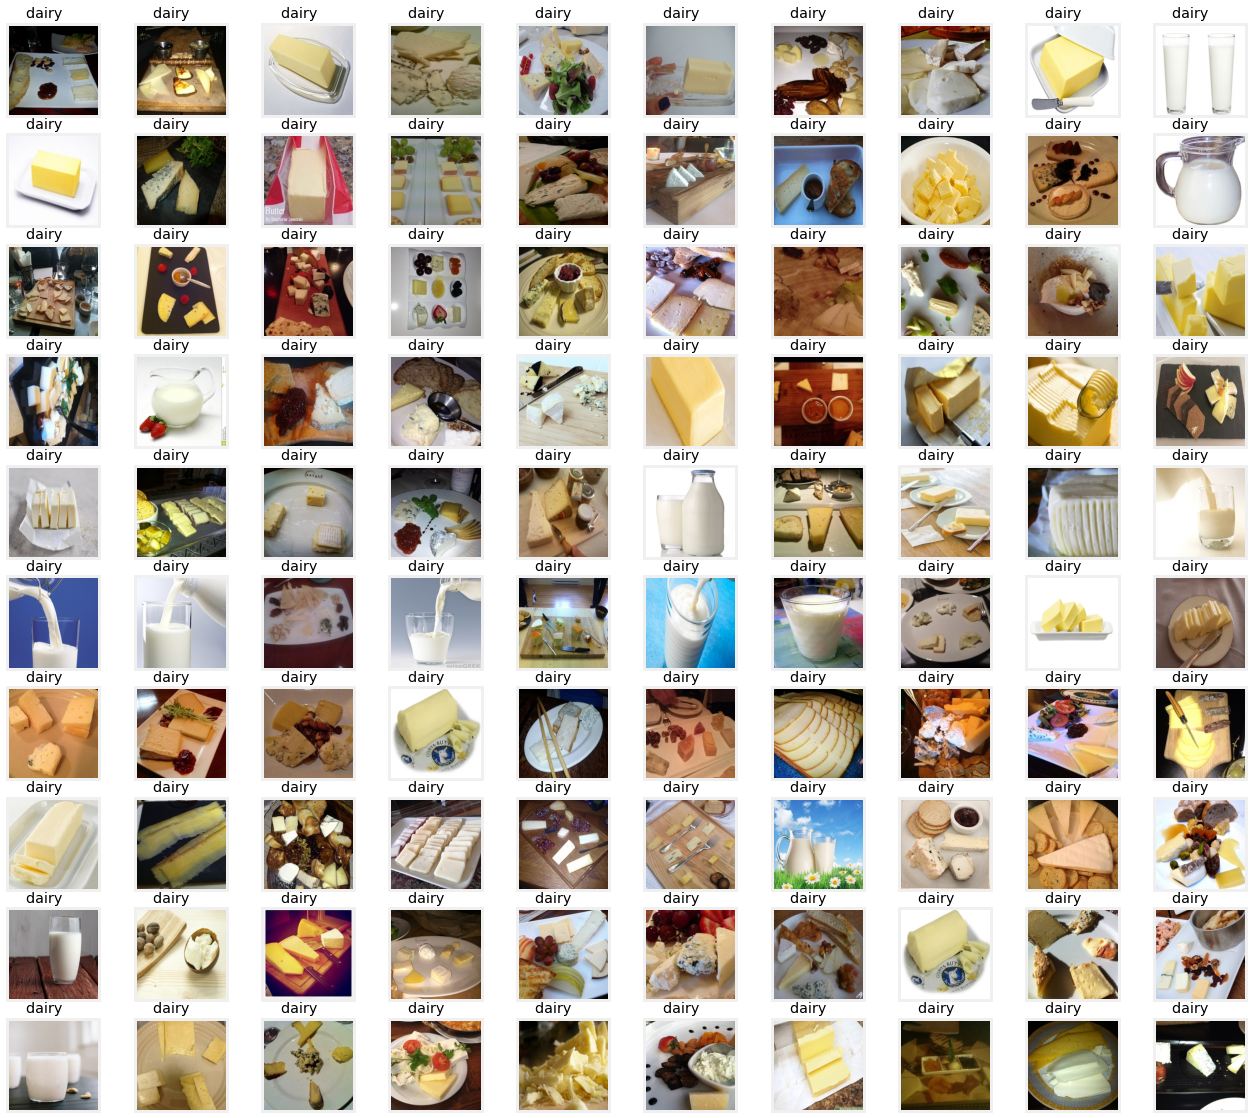

In [ ]:
plt.figure(figsize=(20,20))
for i in range(100):
    plt.subplot(10,10,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False) 
    plt.imshow(train[i])
    plt.title(y_train[i])
plt.show()

In [ ]:
freq_train = {}
for y in y_train:
  if y not in freq_train:
    freq_train[y] = 1

  else:
    freq_train[y] += 1
freq_train

{'bread    ': 994,
 'dairy    ': 429,
 'dessert  ': 1500,
 'egg      ': 986,
 'fried    ': 848,
 'meat     ': 1325,
 'noodles  ': 440,
 'rice     ': 280,
 'seafood  ': 855,
 'soup     ': 1500,
 'vegetable': 715}

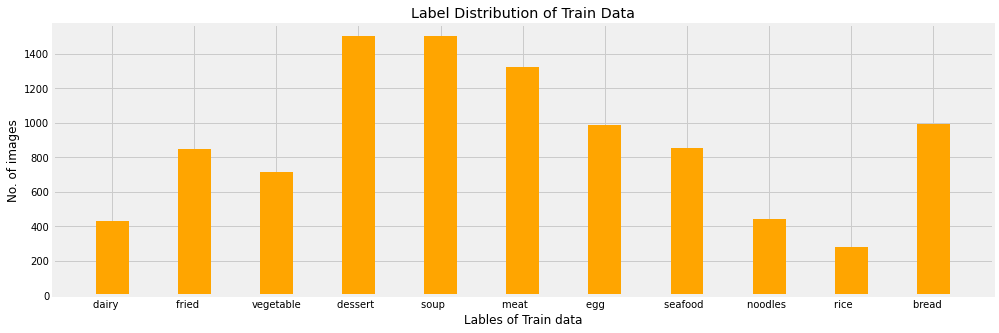

In [ ]:

########################################################################################################################
#_____________________________________________________Frequency Distribution Of Train Data___________________________________________ 
########################################################################################################################

labels = list(freq_train.keys()) 
values1 = list(freq_train.values()) 
fig = plt.figure(figsize = (15, 5)) 
# creating the bar plot 
plt.bar(labels, values1, color ='orange',  
        width = 0.4) 
  
plt.xlabel("Lables of Train data") 
plt.ylabel("No. of images") 
plt.title("Label Distribution of Train Data") 
plt.show() 

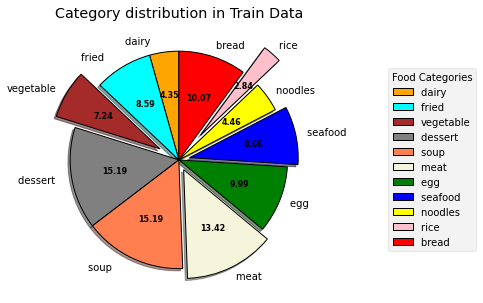

In [ ]:

########################################################################################################################
#_____________________________________________________Cateogories Distribution Of Various CLasses___________________________________________ 
########################################################################################################################


fig = plt.figure(figsize = (15, 5)) 
explode = (0.0, 0.0, 0.2, 0.0, 0.0, 0.1,0.0,0.1,0.0,0.3,0.0) 
wp = { 'linewidth' : 1, 'edgecolor' : "black" } 
colors = ( "orange", "cyan", "brown", 
          "grey", "coral", "beige","green","blue","yellow","pink","red")
wedges, texts, autotexts = plt.pie(values1,labels = labels,explode = explode,autopct='%1.2f',startangle=90,colors = colors,wedgeprops = wp,shadow = True)
plt.legend(labels, 
          title ="Food Categories", 
          loc ="center left", 
          bbox_to_anchor =(1.25, 0, 1, 1)) 
plt.setp(autotexts, size = 8, weight ="bold")
plt.title("Category distribution in Train Data")
plt.show()

In [ ]:
# Normalize pixel values to be between 0 and 1
train = np.array(train)
train = train / 255.0
test = np.array(test)
test = test/255.0

In [ ]:
plt.figure(figsize=(20,20))
for i in range(100):
    plt.subplot(10,10,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False) 
    plt.imshow(train[i])
    plt.title(y_train[i])
plt.show()

In [ ]:
#Test Part Here

test = test_data['X_test']
y_test = test_data['y_test']
plt.figure(figsize=(20,20))
for i in range(100):
    plt.subplot(10,10,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False) 
    plt.imshow(test[i])
    plt.title(y_test[i])
plt.show()

In [ ]:
freq_test = {}
for y in y_test:
  if y not in freq_test:
    freq_test[y] = 1

  else:
    freq_test[y] += 1
freq_test

In [ ]:
labels = list(freq_test.keys()) 
values = list(freq_test.values()) 
fig = plt.figure(figsize = (15, 5)) 
# creating the bar plot 
plt.bar(labels, values, color ='maroon',  
        width = 0.4) 
  
plt.xlabel("Lables of Test data") 
plt.ylabel("No. of images") 
plt.title("Label Distribution of Test Data") 
plt.show() 

In [ ]:
fig = plt.figure(figsize = (15, 5)) 
explode = (0.0, 0.0, 0.2, 0.0, 0.0, 0.1,0.0,0.1,0.0,0.3,0.0) 
wp = { 'linewidth' : 1, 'edgecolor' : "black" } 
colors = ( "orange", "cyan", "brown", 
          "grey", "coral", "beige","green","blue","yellow","pink","red")
wedges, texts, autotexts = plt.pie(values,labels = labels,explode = explode,autopct='%1.2f',startangle=90,colors = colors,wedgeprops = wp,shadow = True)
plt.legend(labels, 
          title ="Food Categories", 
          loc ="center left", 
          bbox_to_anchor =(1.25, 0, 1, 1)) 
plt.setp(autotexts, size = 8, weight ="bold")
plt.title("Category distribution in Test Data")
plt.show()

In [ ]:

########################################################################################################################
#_____________________________________________________Encoding the Data(Images to one hot encoding)___________________________________________ 
########################################################################################################################



label_encoder = LabelEncoder()
int_encoded = label_encoder.fit_transform(y_train)
test_int_encoded = label_encoder.fit_transform(y_test)
int_encoded

In [ ]:
# binary encode
onehot_encoder = OneHotEncoder(sparse=False)
int_encoded = int_encoded.reshape(len(int_encoded), 1)
train_encoded = onehot_encoder.fit_transform(int_encoded)
print(train_encoded)
print("test encoded: ")
test_int_encoded = test_int_encoded.reshape(len(test_int_encoded), 1)
test_encoded = onehot_encoder.fit_transform(test_int_encoded)
print(test_encoded)

In [ ]:

########################################################################################################################
#________________________Creating the  BASE MOdel ANd Encapsulating it in Pretrained___________________________________#
########################################################################################################################

from keras.preprocessing import image
from keras.applications import resnet50, inception_v3, vgg16
from keras.models import Model
from keras.layers import Dense, GlobalAveragePooling2D, Input
from keras.optimizers import Adam
import numpy as np

batch_size = 50
num_classes = 11

#base_model = resnet50.ResNet50
#base_model = inception_v3.InceptionV3
base_model = vgg16.VGG16

base_model = base_model(weights='imagenet', include_top=False,input_shape=(192,192, 3))
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(1024, activation='relu')(x)
predictions = Dense(num_classes, activation='softmax')(x)
model = Model(inputs=base_model.input, outputs=predictions)
for layer in base_model.layers:
    layer.trainable = False
   

model.compile(loss='categorical_crossentropy',
              optimizer=Adam(lr=0.0001),
              metrics=['acc'])


model.fit(train, train_encoded,
          epochs=100,
          batch_size=100,
          shuffle=False,
          validation_data=(test, test_encoded))

print(model.evaluate(test, test_encoded, batch_size=batch_size, verbose=0))


In [ ]:
########################################################################################################################
#____________________________________________________________Training The Model___________________________________#
# ########################################################################################################################
# hist=model.fit(train, train_encoded, batch_size=100, epochs=5, validation_data=(test, test_encoded))

In [ ]:
# ########################################################################################################################
# #____________________________________________________________Saving The Model___________________________________#
# ########################################################################################################################

# model.save("/content/drive/MyDrive/IR project-Food Segmentation/inception_model.pb")
accuracy = model.evaluate(x=test,y=test_encoded,batch_size=256)
print("Test loss:",accuracy[0])
print("Test accuracy: ",accuracy[1])

In [ ]:
########################################################################################################################
#____________________________________________________________Accuracy Plot Of the MOdel___________________________________#
########################################################################################################################

plt.plot(hist.history['acc'])
plt.plot(hist.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
########################################################################################################################
#____________________________________________________________Loss Plot Of the Model___________________________________#
########################################################################################################################

plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
images=[]
images.append('/content/drive/MyDrive/IR project-Food Segmentation/IR_Project/evaluation/Bread/bread_0.jpg')
images.append('/content/drive/MyDrive/IR project-Food Segmentation/IR_Project/evaluation/Dessert/dessert_100.jpg')
images.append('/content/drive/MyDrive/IR project-Food Segmentation/IR_Project/evaluation/Meat/meat_104.jpg')
images.append('/content/drive/MyDrive/IR project-Food Segmentation/IR_Project/evaluation/Dairy Product/dairy_113.jpg')
images.append('/content/drive/MyDrive/IR project-Food Segmentation/IR_Project/evaluation/Rice/rice_17.jpg')
images.append('/content/drive/MyDrive/IR project-Food Segmentation/IR_Project/evaluation/Noodles Pasta/noodles_106.jpg')

In [ ]:
########################################################################################################################
#__________________________________________________Testing the Prediction by the model_________________________________#
########################################################################################################################
from PIL import Image
from matplotlib import pyplot as plt
import cv2
import numpy as np
j = 0
plt.figure(figsize=(10,10))
for i in images:
  img = cv2.imread(i)
  img = cv2.cvtColor(img,cv2.COLOR_RGB2BGR)
  newsize = (192,192,3)
  img.resize(newsize)
  img = np.reshape(img, ((-1,192,192, 3)))
  y = model.predict(img)
  inverted = label_encoder.inverse_transform([argmax(y)]) 
  img = cv2.imread(i)
  img = cv2.cvtColor(img,cv2.COLOR_RGB2BGR)
  plt.subplot(3,3,j+1)
  j = j + 1
  plt.imshow(img)
  plt.xticks([])
  plt.yticks([])
  plt.title(inverted)
  plt.grid(False)
plt.show()